<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/04_Sentiment_Analysis_Chapter_2_of_Tidy_Book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

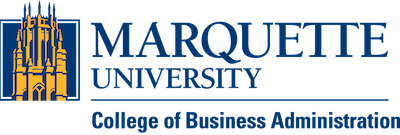

#BUAN4060: Unstructured Data Analytics

##04 Sentiment Analysis Chapter 2 of Tidy Book

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



##1. Sentiment analysis with tidy data

In the previous chapter, we explored in depth what we mean by the tidy text format and showed how this format can be used to approach questions about word frequency

This allowed us to analyze which words are used most frequently in documents and to compare documents, but now let’s investigate a different topic. Let’s address the topic of opinion mining or sentiment analysis

When human readers approach a text, we use our understanding of the emotional intent of words to infer whether a section of text is positive or negative, or perhaps characterized by some other more nuanced emotion like surprise or disgust

We can use the tools of text mining to approach the emotional content of text programmatically, as shown in Figure 1.1.

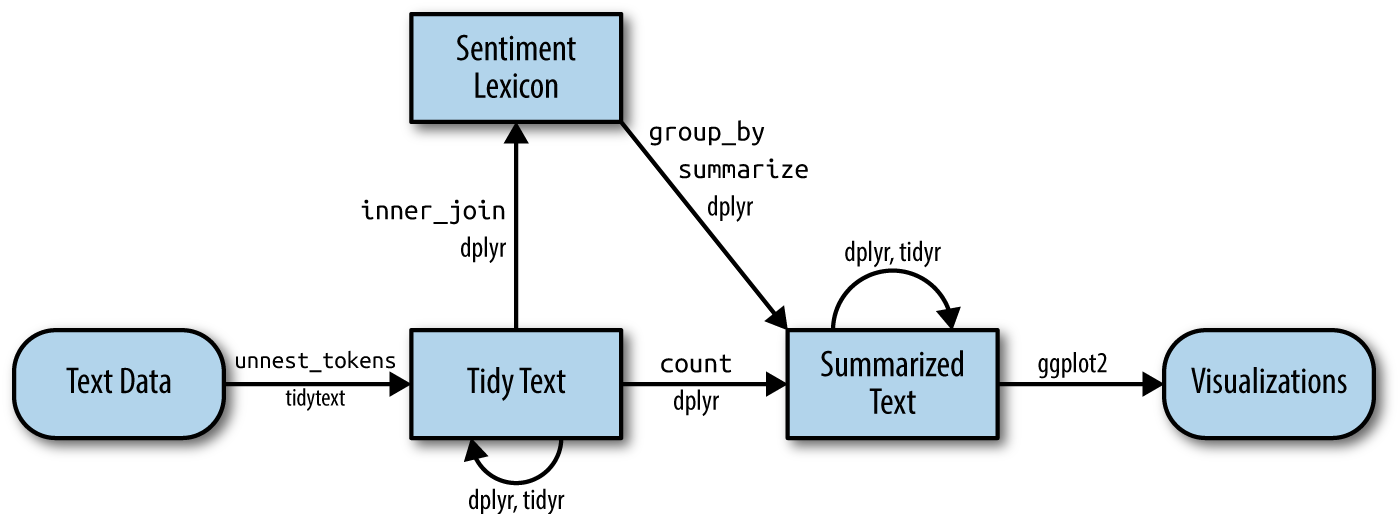

Figure 1.1: A flowchart of a typical text analysis that uses tidytext for sentiment analysis. This chapter shows how to implement sentiment analysis using tidy data principles.

One way to analyze the sentiment of a text is to consider the text as a combination of its individual words and the sentiment content of the whole text as the sum of the sentiment content of the individual words. This isn’t the only way to approach sentiment analysis, but it is an often-used approach, and an approach that naturally takes advantage of the tidy tool ecosystem.

### 1.1 The `sentiments` datasets

As discussed above, there are a variety of methods and dictionaries that exist for evaluating the opinion or emotion in text. The tidytext package provides access to several sentiment lexicons. Three general-purpose lexicons are

* `AFINN` from [Finn Årup Nielsen](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010),
* `bing` from [Bing Liu and collaborators](https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html),
* `nrc` from [Saif Mohammad and Peter Turney](http://saifmohammad.com/WebPages/NRC-Emotion-Lexicon.htm)

All three of these lexicons are based on unigrams, i.e., single words. These lexicons contain many English words and the words are assigned scores for positive/negative sentiment, and also possibly emotions like joy, anger, sadness, and so forth. The nrc lexicon categorizes words in a binary fashion (“yes”/“no”) into categories of positive, negative, anger, anticipation, disgust, fear, joy, sadness, surprise, and trust. The bing lexicon categorizes words in a binary fashion into positive and negative categories. The AFINN lexicon assigns words with a score that runs between -5 and 5, with negative scores indicating negative sentiment and positive scores indicating positive sentiment.

These lexicons are available under different licenses, so be sure that the license for the lexicon you want to use is appropriate for your project. You may be asked to agree to a license before downloading data.

The function `get_sentiments()` allows us to get specific sentiment lexicons with the appropriate measures for each one.

In [2]:
install.packages("tidytext")
install.packages("textdata")
library(tidytext)
library(textdata)

# Download the AFINN lexicon directly from the URL
download.file("https://drive.google.com/file/d/1W_lAKpraz6JXZaWN4Nol77iG2ui4D56J/view?usp=share_link",
              destfile = "AFINN-111.txt")

# Load the AFINN lexicon manually
afinn <- read.delim("AFINN-111.txt", header = TRUE, col.names = c("word", "value"))

# Check the content
head(afinn)

# used to retrieve the AFINN-111 wordlist for sentiment analysis in the tidytext package in R
# AFINN is a list of pre-computed sentiment scores for words in the English language
# Each word in the AFINN wordlist is associated with a numerical sentiment score, which can be positive or negative,
# indicating the sentiment or emotional polarity of the word

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“header and 'col.names' are of different lengths”


word                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [3]:
# Use 'bing' lexicon instead
bing <- get_sentiments("bing")

# Check the content
bing

word,sentiment
<chr>,<chr>
2-faces,negative
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative
abort,negative
aborted,negative


In [4]:
# Install necessary packages
install.packages("dplyr")
install.packages("readr")

# Load the required libraries
library(dplyr)
library(readr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
# Step 1: Download the NRC lexicon zip file
download.file("http://saifmohammad.com/WebDocs/Lexicons/NRC-Emotion-Lexicon.zip",
              destfile = "NRC-Emotion-Lexicon.zip")

# Step 2: Unzip the file
unzip("NRC-Emotion-Lexicon.zip", exdir = "/content/nrc_lexicon")

# Step 3: List files in the unzipped directory to check the file structure
list.files("nrc_lexicon")

# Now, look for the exact file name printed in the output of the `list.files()` call.
# Let's assume the correct file name is 'NRC-Emotion-Lexicon-Wordlevel-v0.92.txt'

# Step 4: Load the NRC lexicon file into R
nrc_file <- "/content/nrc_lexicon/NRC-Emotion-Lexicon/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt"  # Adjust the file name if different
nrc <- read_delim(nrc_file, delim = "\t", col_names = c("word", "sentiment", "value"))

# Step 5: Filter and clean the data (only keep rows where value = 1)
nrc <- nrc %>% filter(value == 1) %>% select(-value)

# Step 6: Check the first few rows of the NRC lexicon
head(nrc)

[1] "__MACOSX"            "NRC-Emotion-Lexicon"

Rows: 141540 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): word, sentiment
dbl (1): value

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear


In [6]:
nrc

word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger


How were these sentiment lexicons put together and validated? They were constructed via either crowdsourcing (using, for example, Amazon Mechanical Turk) or by the labor of one of the authors, and were validated using some combination of crowdsourcing again, restaurant or movie reviews, or Twitter data. Given this information, we may hesitate to apply these sentiment lexicons to styles of text dramatically different from what they were validated on, such as narrative fiction from 200 years ago. While it is true that using these sentiment lexicons with, for example, Jane Austen’s novels may give us less accurate results than with tweets sent by a contemporary writer, we still can measure the sentiment content for words that are shared across the lexicon and the text.

There are also some domain-specific sentiment lexicons available, constructed to be used with text from a specific content area.

Dictionary-based methods like the ones we are discussing find the total sentiment of a piece of text by adding up the individual sentiment scores for each word in the text.

Not every English word is in the lexicons because many English words are pretty neutral. It is important to keep in mind that these methods do not take into account qualifiers before a word, such as in “no good” or “not true”; a lexicon-based method like this is based on unigrams only. For many kinds of text (like the narrative examples below), there are not sustained sections of sarcasm or negated text, so this is not an important effect. Also, we can use a tidy text approach to begin to understand what kinds of negation words are important in a given text; More on this in Week 7

One last caveat is that the size of the chunk of text that we use to add up unigram sentiment scores can have an effect on an analysis. A text the size of many paragraphs can often have positive and negative sentiment averaged out to about zero, while sentence-sized or paragraph-sized text often works better.

###1.2 Sentiment analysis with inner join

With data in a tidy format, sentiment analysis can be done as an inner join. This is another of the great successes of viewing text mining as a tidy data analysis task; much as removing stop words is an antijoin operation, performing sentiment analysis is an inner join operation.

Let’s look at the words with a joy score from the NRC lexicon. What are the most common joy words in Emma? First, we need to take the text of the novels and convert the text to the tidy format using unnest_tokens(), just as we did in Week 5. Let’s also set up some other columns to keep track of which line and chapter of the book each word comes from; we use group_by and mutate to construct those columns.

In [7]:
install.packages("janeaustenr") # contains the text of Jane Austen's novels
install.packages("dplyr") # used for data manipulation.
install.packages("stringr") # provides functions for working with strings

library(janeaustenr)
library(dplyr)
library(stringr)

tidy_books <- austen_books() %>%
  # retrieve the text of Jane Austen's novels
  # It returns a data frame with columns for the book's title and the text
  group_by(book) %>%
    # group the data frame by the "book" column, which represents the title of each Jane Austen novel
  mutate( # add two new columns to the data frame
    linenumber = row_number(),
    chapter = cumsum(str_detect(text,
                                regex("^chapter [\\divxlc]",
                                      ignore_case = TRUE)))) %>%
  ungroup() %>%
  # ungroup the data frame, removing the grouping by book title
  unnest_tokens(word, text)
  # Tokenize the text in the "text" column, splitting it into words
  # It creates a new column called "word" that contains individual words from the text

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Notice that we chose the name `word` for the output column from `unnest_tokens()`. This is a convenient choice because the sentiment lexicons and stop word datasets have columns named word; performing inner joins and anti-joins is thus easier.

Now that the text is in a tidy format with one word per row, we are ready to do the sentiment analysis. First, let’s use the NRC lexicon and `filter()` for the joy words. Next, let’s `filter()` the data frame with the text from the books for the words from Emma and then use `inner_join()` to perform the sentiment analysis. What are the most common joy words in Emma? Let’s use `count()` from dplyr.

In [ ]:
nrc_joy <- nrc %>%
  filter(sentiment == "joy")

tidy_books %>%
  filter(book == "Emma") %>%
  inner_join(nrc_joy) %>% # perform an inner join with the nrc_joy data frame, matching words in the book with words from the "joy" sentiment lexicon
  count(word, sort = TRUE)

Joining with `by = join_by(word)`


word,n
<chr>,<int>
good,359
friend,166
hope,143
happy,125
love,117
deal,92
found,92
present,89
kind,82


We see mostly positive, happy words about hope, friendship, and love here. We also see some words that may not be used joyfully by Austen (“found”, “present”); we will discuss this in more detail in Section 1.4.

We can also examine how sentiment changes throughout each novel. We can do this with just a handful of lines that are mostly dplyr functions. First, we find a sentiment score for each word using the Bing lexicon and `inner_join()`.

Next, we count up how many positive and negative words there are in defined sections of each book. We define an index here to keep track of where we are in the narrative; this index (using integer division) counts up sections of 80 lines of text.

The `%/%` operator does integer division (`x %/% y` is equivalent to `floor(x/y)`) so the index keeps track of which 80-line section of text we are counting up negative and positive sentiment in.

Small sections of text may not have enough words in them to get a good estimate of sentiment while really large sections can wash out narrative structure. For these books, using 80 lines works well, but this can vary depending on individual texts, how long the lines were to start with, etc. We then use `pivot_wider()` so that we have negative and positive sentiment in separate columns, and lastly calculate a net sentiment (positive - negative).



In [8]:
install.packages("tidyr")
library(tidyr)

jane_austen_sentiment <- tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  # Combine the tidy_books data frame with sentiment information obtained using the "bing" lexicon from get_sentiments("bing")
  # This inner join links words from the books with sentiment information, including positive and negative sentiment scores
  count(book, index = linenumber %/% 80, sentiment) %>%
    # Count the occurrences of sentiment words within each book and groups them by book (the book's name),
    # index (a calculated value based on the line number divided by 80 to group lines into sections), and sentiment (positive or negative)
  pivot_wider(names_from = sentiment, values_from = n, values_fill = 0) %>%
    # Reshape the data from long to wide format. It takes the counts for positive and negative sentiments
    # and pivots them into separate columns, with the counts as values. Any missing values are filled with 0
  mutate(sentiment = positive - negative)
  # Calculate a new column called sentiment, which represents the overall sentiment score for each section of the book
  # This score is obtained by subtracting the count of negative sentiment words from the count of positive sentiment words

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Joining with `by = join_by(word)`
Warning message in inner_join(., get_sentiments("bing")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


Now we can plot these sentiment scores across the plot trajectory of each novel. Notice that we are plotting against the `index` on the x-axis that keeps track of narrative time in sections of text.

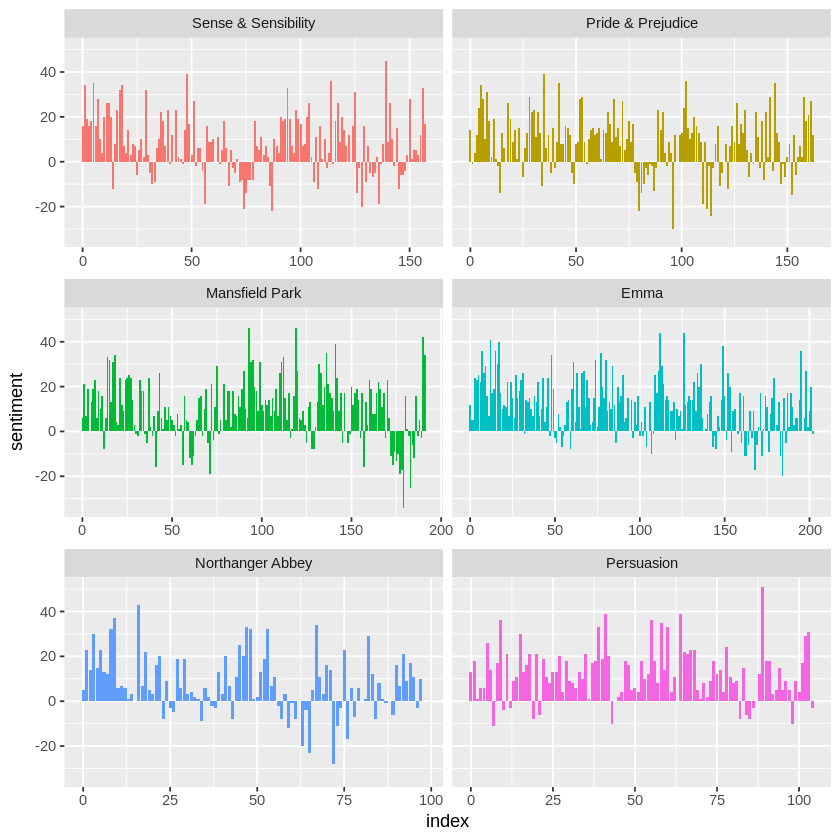

In [ ]:
library(ggplot2)

ggplot(jane_austen_sentiment, aes(index, sentiment, fill = book)) +
  # Initialize a ggplot object and specifies the data frame jane_austen_sentiment as the data source
  # aes(index, sentiment, fill = book) sets up the aesthetic mappings

  geom_col(show.legend = FALSE) +
    # create grouped bar columns
  facet_wrap(~book, ncol = 2, scales = "free_x")
  # Split the plot into facets (smaller subplots) based on the book variable

Figure 1.2: Sentiment through the narratives of Jane Austen’s novels

We can see in Figure 1.2 how the plot of each novel changes toward more positive or negative sentiment over the trajectory of the story.

###1.3 Comparing the three sentiment dictionaries

With several options for sentiment lexicons, you might want some more information on which one is appropriate for your purposes. Let’s use all three sentiment lexicons and examine how the sentiment changes across the narrative arc of Pride and Prejudice. First, let’s use `filter()` to choose only the words from the one novel we are interested in.

In [9]:
pride_prejudice <- tidy_books %>%
  filter(book == "Pride & Prejudice")

pride_prejudice

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Pride & Prejudice,1,0,pride
Pride & Prejudice,1,0,and
Pride & Prejudice,1,0,prejudice
Pride & Prejudice,3,0,by
Pride & Prejudice,3,0,jane
Pride & Prejudice,3,0,austen
Pride & Prejudice,7,1,chapter
Pride & Prejudice,7,1,1
Pride & Prejudice,10,1,it


Now, we can use `inner_join()` to calculate the sentiment in different ways.

Remember from above that the AFINN lexicon measures sentiment with a numeric score between -5 and 5, while the other two lexicons categorize words in a binary fashion, either positive or negative. To find a sentiment score in chunks of text throughout the novel, we will need to use a different pattern for the AFINN lexicon than for the other two.

Let’s again use integer division (`%/%`) to define larger sections of text that span multiple lines, and we can use the same pattern with `count()`, `pivot_wider()`, and `mutate()` to find the net sentiment in each of these sections of text.

In [10]:
afinn <- pride_prejudice %>%
  inner_join(afinn) %>%
  group_by(index = linenumber %/% 80) %>%
  summarise(sentiment = sum(value)) %>%
  mutate(method = "AFINN")

bing_and_nrc <- bind_rows(
  pride_prejudice %>%
    inner_join(get_sentiments("bing")) %>%
    mutate(method = "Bing et al."),
  pride_prejudice %>%
    inner_join(nrc) %>%
                 filter(sentiment %in% c("positive",
                                         "negative"))
    ) %>%
    mutate(method = "NRC") %>%
  count(method, index = linenumber %/% 80, sentiment) %>%
  pivot_wider(names_from = sentiment,
              values_from = n,
              values_fill = 0) %>%
                # Pivot the data from long to wide format, with columns for "positive" and "negative" sentiments and fills any missing values with 0
                # This makes it easier to visualize and analyze sentiment scores for each method

  mutate(sentiment = positive - negative)
  # Calculate the overall sentiment score by subtracting the negative sentiment score from the positive sentiment score for each section of text

Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Joining with `by = join_by(word)`
Warning message in inner_join(., nrc):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 1 of `x` matches multiple rows in `y`.
ℹ Row 12737 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


We now have an estimate of the net sentiment (positive - negative) in each chunk of the novel text for each sentiment lexicon. Let’s bind them together and visualize them in Figure 1.3.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



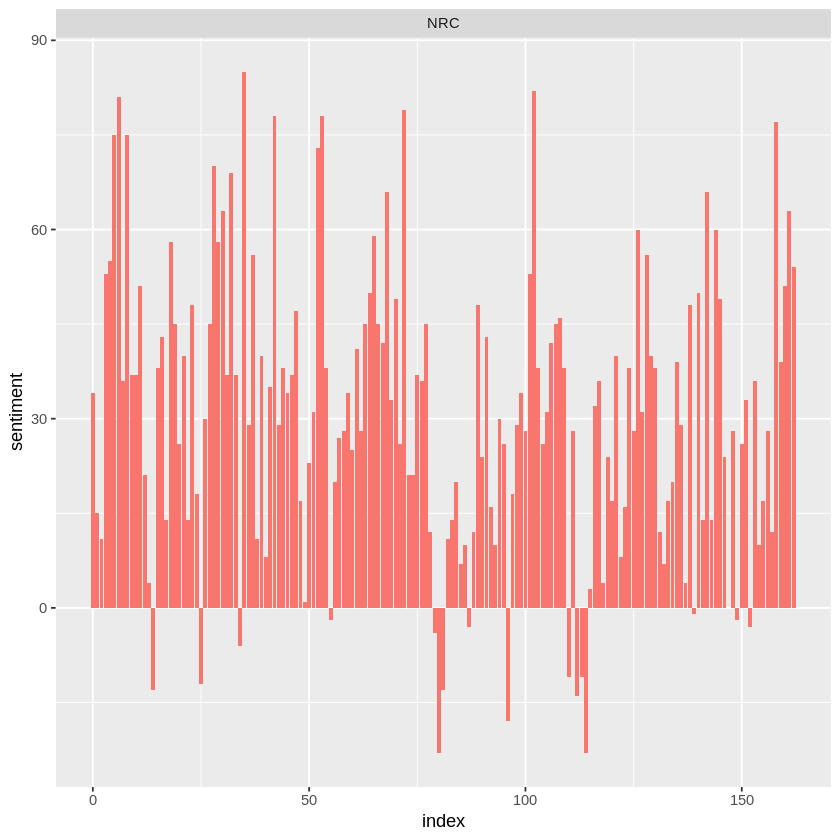

In [13]:
install.packages("ggplot2")
library("ggplot2")

bind_rows(afinn,
          bing_and_nrc) %>%
  ggplot(aes(index, sentiment, fill = method)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~method, ncol = 1, scales = "free_y")

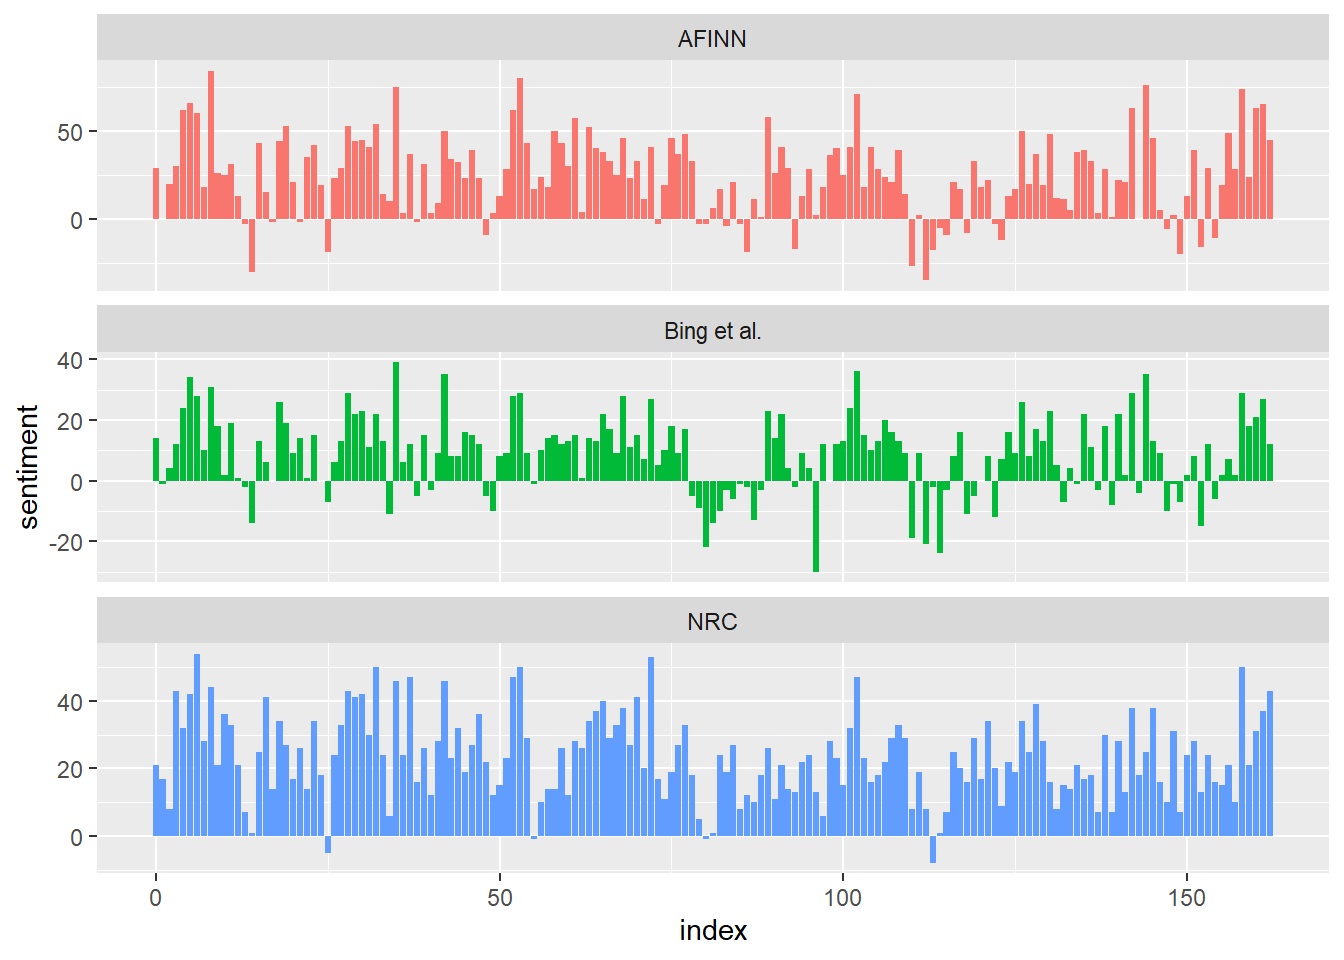

Figure 1.3: Comparing three sentiment lexicons using Pride and Prejudice

The three different lexicons for calculating sentiment give results that are different in an absolute sense but have similar relative trajectories through the novel. We see similar dips and peaks in sentiment at about the same places in the novel, but the absolute values are significantly different. The AFINN lexicon gives the largest absolute values, with high positive values. The lexicon from Bing et al. has lower absolute values and seems to label larger blocks of contiguous positive or negative text. The NRC results are shifted higher relative to the other two, labeling the text more positively, but detects similar relative changes in the text. We find similar differences between the methods when looking at other novels; the NRC sentiment is high, the AFINN sentiment has more variance, the Bing et al. sentiment appears to find longer stretches of similar text, but all three agree roughly on the overall trends in the sentiment through a narrative arc.

Why is, for example, the result for the NRC lexicon biased so high in sentiment compared to the Bing et al. result? Let’s look briefly at how many positive and negative words are in these lexicons.

In [14]:
nrc %>%
  filter(sentiment %in% c("positive", "negative")) %>%
  count(sentiment)

sentiment,n
<chr>,<int>
negative,3316
positive,2308


In [15]:
bing %>%
  count(sentiment)

sentiment,n
<chr>,<int>
negative,4781
positive,2005


Both lexicons have more negative than positive words, but the ratio of negative to positive words is higher in the Bing lexicon than the NRC lexicon. This will contribute to the effect we see in the plot above, as will any systematic difference in word matches, e.g. if the negative words in the NRC lexicon do not match the words that Jane Austen uses very well. Whatever the source of these differences, we see similar relative trajectories across the narrative arc, with similar changes in slope, but marked differences in absolute sentiment from lexicon to lexicon. This is all important context to keep in mind when choosing a sentiment lexicon for analysis.

###1.4 Most common positive and negative words

One advantage of having the data frame with both sentiment and word is that we can analyze word counts that contribute to each sentiment. By implementing `count()` here with arguments of both `word` and `sentiment`, we find out how much each word contributed to each sentiment.

In [16]:
bing_word_counts <- tidy_books %>%
  inner_join(bing) %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup()

bing_word_counts

Joining with `by = join_by(word)`
Warning message in inner_join(., bing):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


word,sentiment,n
<chr>,<chr>,<int>
miss,negative,1855
well,positive,1523
good,positive,1380
great,positive,981
like,positive,725
better,positive,639
enough,positive,613
happy,positive,534
love,positive,495


This can be shown visually, and we can pipe straight into ggplot2, if we like, because of the way we are consistently using tools built for handling tidy data frames.

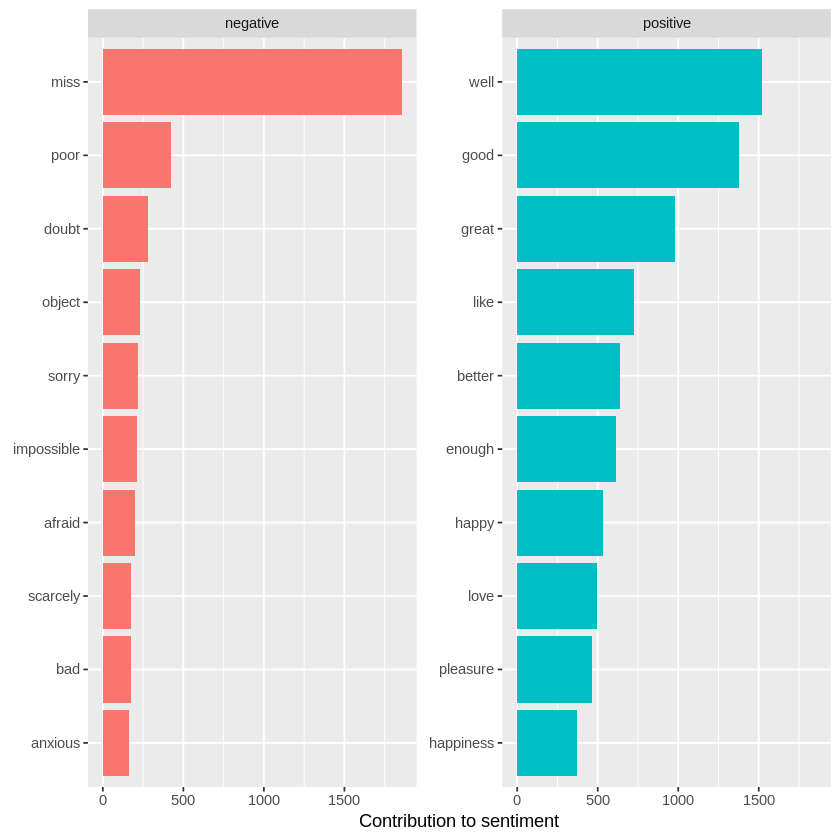

In [17]:
bing_word_counts %>%
  group_by(sentiment) %>%
  slice_max(n, n = 10) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(n, word, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(x = "Contribution to sentiment",
       y = NULL)

Figure 1.4: Words that contribute to positive and negative sentiment in Jane Austen’s novels

Figure 1.4 lets us spot an anomaly in the sentiment analysis; the word “miss” is coded as negative but it is used as a title for young, unmarried women in Jane Austen’s works. If it were appropriate for our purposes, we could easily add “miss” to a custom stop-words list using `bind_rows()`. We could implement that with a strategy such as this.

In [18]:
custom_stop_words <- bind_rows(tibble(word = c("miss"),
                                      lexicon = c("custom")),
                               stop_words)

custom_stop_words

word,lexicon
<chr>,<chr>
miss,custom
a,SMART
a's,SMART
able,SMART
about,SMART
above,SMART
according,SMART
accordingly,SMART
across,SMART


###1.5 Wordclouds

We’ve seen that this tidy text mining approach works well with ggplot2, but having our data in a tidy format is useful for other plots as well.

For example, consider the wordcloud package, which uses base R graphics. Let’s look at the most common words in Jane Austen’s works as a whole again, but this time as a wordcloud in Figure 1.5.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: RColorBrewer

Joining with `by = join_by(word)`


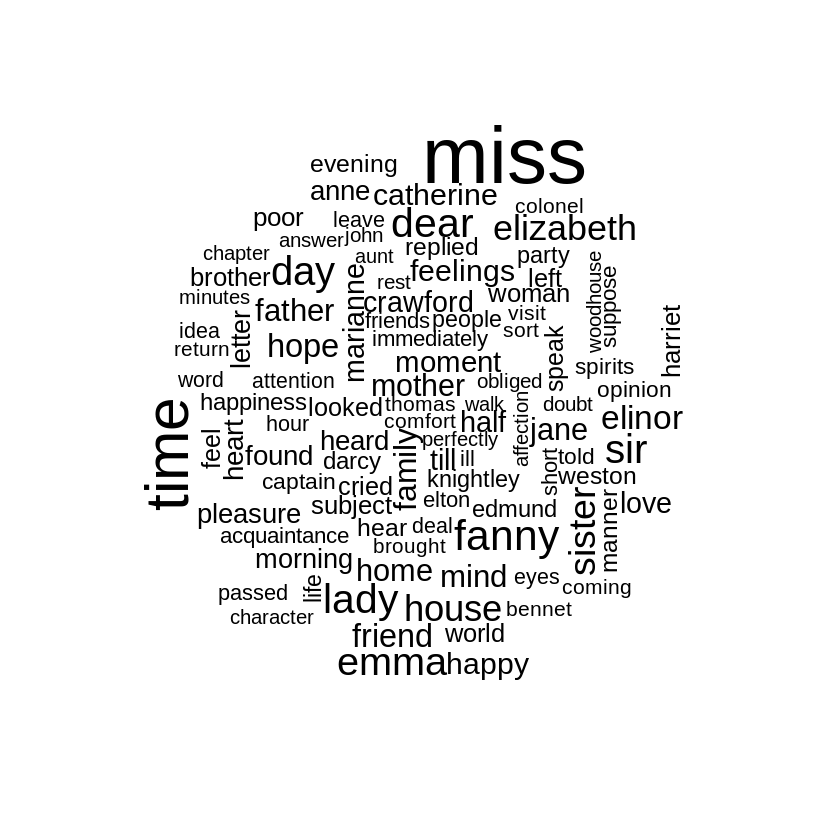

In [19]:
install.packages("wordcloud")
library(wordcloud)

tidy_books %>%
  anti_join(stop_words) %>%
  count(word) %>%
  with(wordcloud(word, n, max.words = 100))

Figure 1.5: The most common words in Jane Austen’s novels

In other functions, such as `comparison.cloud()`, you may need to turn the data frame into a matrix with reshape2’s `acast()`. Let’s do the sentiment analysis to tag positive and negative words using an inner join, then find the most common positive and negative words. Until the step where we need to send the data to `comparison.cloud()`, this can all be done with joins, piping, and dplyr because our data is in tidy format.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


Joining with `by = join_by(word)`
Warning message in inner_join(., get_sentiments("bing")):
“Detected an unexpected many-to-many relationship between `x` and `y`.
ℹ Row 435434 of `x` matches multiple rows in `y`.
ℹ Row 5051 of `y` matches multiple rows in `x`.
ℹ If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning.”


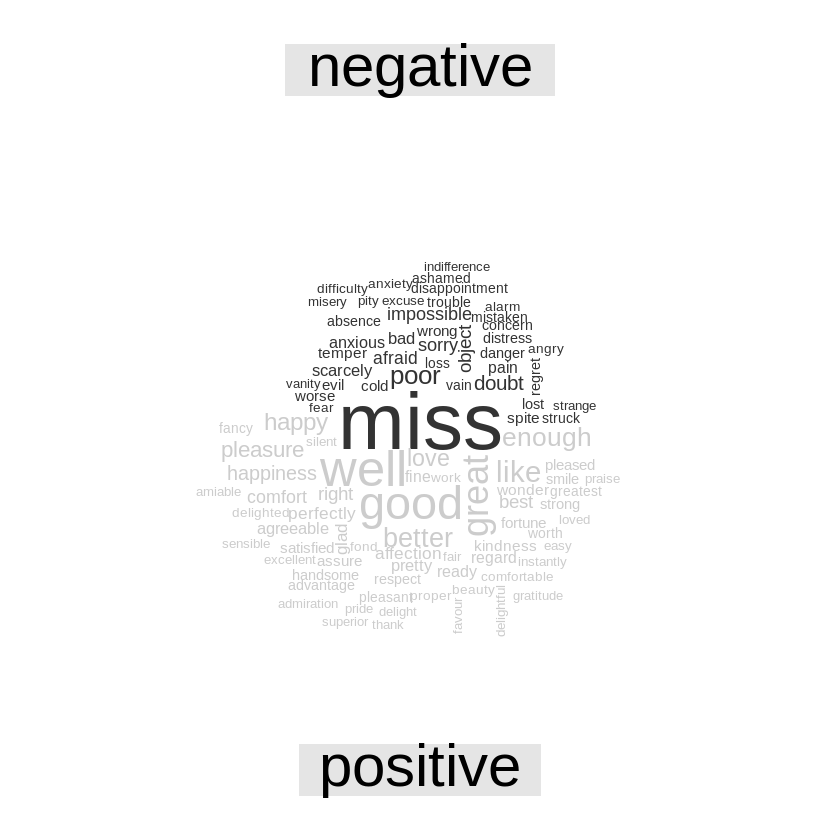

In [20]:
install.packages("reshape2")
library(reshape2)

tidy_books %>%
  inner_join(get_sentiments("bing")) %>%
  count(word, sentiment, sort = TRUE) %>%
  acast(word ~ sentiment, value.var = "n", fill = 0) %>%
  comparison.cloud(colors = c("gray20", "gray80"),
                   max.words = 100)

Figure 1.6: Most common positive and negative words in Jane Austen’s novels

The size of a word’s text in Figure 1.6 is in proportion to its frequency within its sentiment. We can use this visualization to see the most important positive and negative words, but the sizes of the words are not comparable across sentiments.



###1.6 Looking at units beyond just words

Lots of useful work can be done by tokenizing at the word level, but sometimes it is useful or necessary to look at different units of text. For example, some sentiment analysis algorithms look beyond only unigrams (i.e. single words) to try to understand the sentiment of a sentence as a whole. These algorithms try to understand that

    I am not having a good day.

is a sad sentence, not a happy one, because of negation. R packages included coreNLP [@R-coreNLP], cleanNLP [@R-cleanNLP], and sentimentr [@R-sentimentr] are examples of such sentiment analysis algorithms. For these, we may want to tokenize text into sentences, and it makes sense to use a new name for the output column in such a case.

In [21]:
p_and_p_sentences <- tibble(text = prideprejudice) %>%
  unnest_tokens(sentence, text, token = "sentences")

Let’s look at just one.

In [22]:
p_and_p_sentences$sentence[2]

[1] "by jane austen"

The sentence tokenizing does seem to have a bit of trouble with UTF-8 encoded text, especially with sections of dialogue; it does much better with punctuation in ASCII. One possibility, if this is important, is to try using `iconv()`, with something like `iconv(text, to = 'latin1')` in a mutate statement before unnesting.

Another option in `unnest_tokens()` is to split into tokens using a regex pattern. We could use this, for example, to split the text of Jane Austen’s novels into a data frame by chapter.

In [23]:
austen_chapters <- austen_books() %>%
  group_by(book) %>%
  unnest_tokens(chapter, text, token = "regex",
                pattern = "Chapter|CHAPTER [\\dIVXLC]") %>%
  ungroup()

austen_chapters %>%
  group_by(book) %>%
  summarise(chapters = n())

book,chapters
<fct>,<int>
Sense & Sensibility,51
Pride & Prejudice,62
Mansfield Park,49
Emma,56
Northanger Abbey,32
Persuasion,25


We have recovered the correct number of chapters in each novel (plus an “extra” row for each novel title). In the austen_chapters data frame, each row corresponds to one chapter.

Near the beginning of this chapter, we used a similar regex to find where all the chapters were in Austen’s novels for a tidy data frame organized by one-word-per-row. We can use tidy text analysis to ask questions such as what are the most negative chapters in each of Jane Austen’s novels? First, let’s get the list of negative words from the Bing lexicon. Second, let’s make a data frame of how many words are in each chapter so we can normalize for the length of chapters. Then, let’s find the number of negative words in each chapter and divide by the total words in each chapter. For each book, which chapter has the highest proportion of negative words?

In [24]:
bingnegative <- (bing) %>%
  filter(sentiment == "negative")

wordcounts <- tidy_books %>%
  group_by(book, chapter) %>%
  summarize(words = n())

tidy_books %>%
  semi_join(bingnegative) %>%
  group_by(book, chapter) %>%
  summarize(negativewords = n()) %>%
  left_join(wordcounts, by = c("book", "chapter")) %>%
  mutate(ratio = negativewords/words) %>%
  filter(chapter != 0) %>%
  slice_max(ratio, n = 1) %>%
  ungroup()

`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.
Joining with `by = join_by(word)`
`summarise()` has grouped output by 'book'. You can override using the
`.groups` argument.


book,chapter,negativewords,words,ratio
<fct>,<int>,<int>,<int>,<dbl>
Sense & Sensibility,43,161,3405,0.04728341
Pride & Prejudice,34,111,2104,0.05275665
Mansfield Park,46,173,3685,0.04694708
Emma,15,151,3340,0.04520958
Northanger Abbey,21,149,2982,0.04996647
Persuasion,4,62,1807,0.03431101


These are the chapters with the most sad words in each book, normalized for number of words in the chapter. What is happening in these chapters? In Chapter 43 of Sense and Sensibility Marianne is seriously ill, near death, and in Chapter 34 of Pride and Prejudice Mr. Darcy proposes for the first time (so badly!). Chapter 46 of Mansfield Park is almost the end, when everyone learns of Henry’s scandalous adultery, Chapter 15 of Emma is when horrifying Mr. Elton proposes, and in Chapter 21 of Northanger Abbey Catherine is deep in her Gothic faux fantasy of murder, etc. Chapter 4 of Persuasion is when the reader gets the full flashback of Anne refusing Captain Wentworth and how sad she was and what a terrible mistake she realized it to be.

###1.7 Summary

Sentiment analysis provides a way to understand the attitudes and opinions expressed in texts. In this chapter, we explored how to approach sentiment analysis using tidy data principles; when text data is in a tidy data structure, sentiment analysis can be implemented as an inner join. We can use sentiment analysis to understand how a narrative arc changes throughout its course or what words with emotional and opinion content are important for a particular text. We will continue to develop our toolbox for applying sentiment analysis to different kinds of text in our case studies later in this book.